# EV simulation

This notebook explores the EV driving and charging behaviour of a population using 6 archetypes. Details of the archetypes are in the file EV_ Archetypes.csv.

- Average (UK)
- Intelligent Octopus average
- Infrequent charging	
- Infrequent driving
- Scheduled charging	
- Always plugged-in

The simulation consists of two models:
1. An EV model that simulates individual vehicle behavior
2. A population model that manages multiple EVs and aggregates their behavior

Each EV in the simulation:
- Has a daily plug-in/out schedule with some random variation
- Drives based on probabilities that vary by time of day
- Charges based on a schedule optimized for electricity prices
- Has a target state of charge (SoC) to reach before unplugging

An overview of the design of the simulation can be found [here](https://docs.google.com/document/d/1PZsT9akJMMpauaZ-f-_b0JCmFjr7IAr-ayupENBtGnI/edit?tab=t.0)

In [1]:
import pandas as pd
from helper import convert_time
from ev_model import EVModel, PopulationSimulator

In [2]:
# read archetype data
archetypes_df = pd.read_csv('EV_Archetypes.csv')
# convert time to int
archetypes_df['Plug-in time'] = archetypes_df['Plug-in time'].apply(convert_time)
archetypes_df['Plug-out time'] = archetypes_df['Plug-out time'].apply(convert_time)
# convert SoC to float - stripping % 
archetypes_df['Target SoC'] = archetypes_df['Target SoC'].str.rstrip('%').astype(float)
archetypes_df['Plug-in SoC'] = archetypes_df['Plug-in SoC'].str.rstrip('%').astype(float)
archetypes_df


,#,Name,% of population,Miles/yr,Battery (kWh),Efficiency (mi/kWh),Plug-in frequency (per day),Charger kW,Plug-in time,Plug-out time,Target SoC,kWh/year,kWh/plug-in,Plug-in SoC,SoC requirement,Charging duration (hrs)
0,1,Average (UK),40,9435,60.0,3.5,1.0,7,18,7,80.0,2696,7,68.0,12%,1.0
1,2,Intelligent Octopus average,30,28105,72.5,3.5,1.0,7,18,7,80.0,8030,22,52.0,28%,2.5
2,3,Infrequent charging,10,9435,60.0,3.5,0.2,7,18,7,80.0,2696,37,18.0,62%,5.0
3,4,Infrequent driving,10,5700,60.0,3.5,1.0,7,18,7,80.0,1629,4,73.0,7%,1.0
4,5,Scheduled charging,9,9435,60.0,3.5,1.0,7,22,9,80.0,2696,7,68.0,12%,1.0
5,6,Always plugged-in,1,9435,60.0,3.5,1.0,7,0,23,80.0,2696,7,68.0,12%,1.0


## Population simulation

The following graph displays the results for the entire population simulation, with each archetype represented by its percentage of the population.

In [3]:
# run simulation
population_size = 10000
simulator = PopulationSimulator(archetypes_df, population_size)
results = simulator.run_simulation(hours=24)

In [4]:
# plot population results
simulator.plot_population_results()

In the next plot, the charging and driving behavours of the different archetypes can be compared by clicking on the archetype name in the legend.

In [5]:
simulator.plot_archetype_comparison_plotly()

ValueError: 
    Invalid value of type 'builtins.dict' received for the 'active' property of layout.updatemenu
        Received value: {'bgcolor': 'rgba(100,100,100,1)', 'font': {'color': 'white'}}

    The 'active' property is a integer and may be specified as:
      - An int (or float that will be cast to an int)
        in the interval [-1, 9223372036854775807]

## Individual EV simulation

An individual EV can be simulated by directly using the EV class.

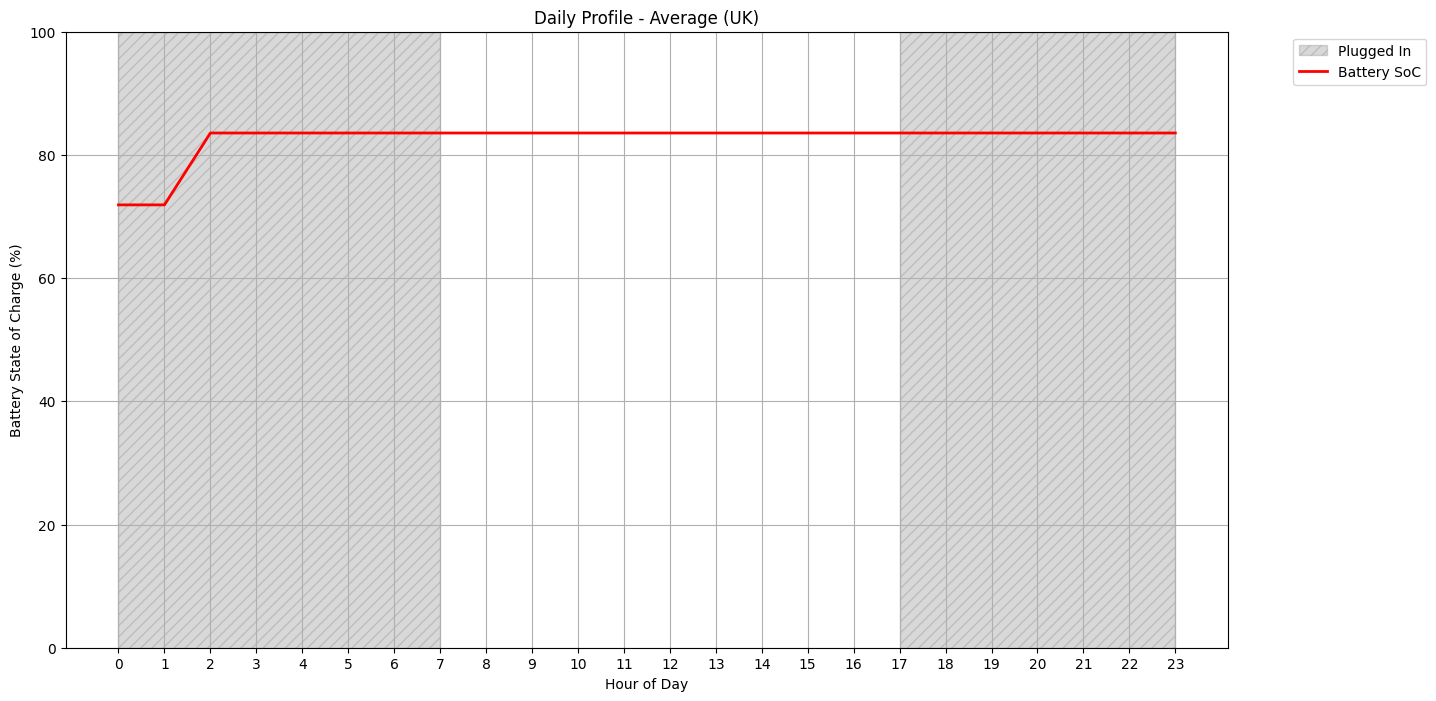

In [6]:
# available archetypes: ['Average (UK)', 'Intelligent Octopus average', 'Infrequent charging', 'Infrequent driving', 'Scheduled charging', 'Always plugged-in']
archetype_name = 'Average (UK)'
ev = EVModel(archetypes_df[archetypes_df['Name'] == archetype_name].iloc[0])
ev.plot_daily_profile()

Or we can plot a indidual EV from the population by choosing the archetype from the dropdown menu.

In [7]:
simulator.plot_individual_daily_profile()